# Разбор примера отраженного в статье

Peeking Inside the Black Box: Visualizing Statistical Learning with Plots of Individual Conditional Expectation
Alex Goldstein, Adam Kapelner, Justin Bleich, Emil Pitkin

https://arxiv.org/abs/1309.6392

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.DataFrame(np.random.RandomState(43).random((1000, 4)), columns=['1', '2', '3', 'eps']) * 2 - 1.
df['eps'] = (df['eps'] + 1) / 2.
df.head()

,1,2,3,eps
0,-0.769891,0.218133,-0.733218,0.240590
1,-0.345722,0.718275,0.332180,0.541162
2,-0.941972,0.467497,-0.210100,0.802047
3,-0.491158,-0.886230,0.733297,0.221029
4,-0.190021,-0.367807,-0.846675,0.843225


In [35]:
df['y'] = 0.2 * df['1'] - 5 * df['2'] + 10 * df['2'] * np.where(df['3'] >= 0, 1, 0) + df['eps']

<AxesSubplot: xlabel='2', ylabel='y'>

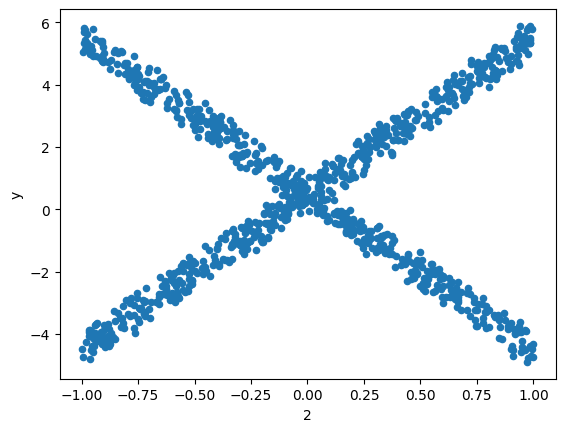

In [36]:
df.plot.scatter('2', 'y')

In [58]:
X_train, y_train = df[['1', '2', '3']], df['y']

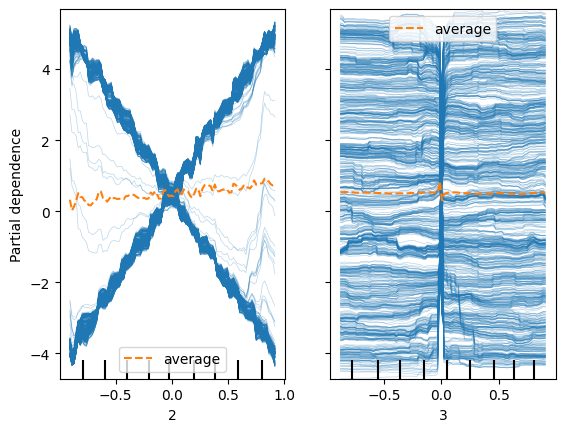

In [59]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor()
est.fit(X_train, y_train)

display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features=["2", "3"],
    kind=["both", "both"],
    grid_resolution=100,
    percentiles=(0.05, 0.95),
    centered=False,
)